# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)  # Figures size by default are 10 x 8

# Regression models
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Tools
from sklearn.model_selection import train_test_split  # Split a dataset in training and testing groups
from sklearn.model_selection import KFold  # Split a dataset in k-fold for the testing
from sklearn.model_selection import cross_val_score   # Evaluate the model in cross validation
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error   # Errors metrics
from sklearn.metrics import explained_variance_score # Explain clasification result
from sklearn.metrics import r2_score # Handle confusion matrix

# Load dataset

In [2]:
# MEDV is the target variable
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('housing.csv', delim_whitespace=True, names=names)

# Data exploration

In [3]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


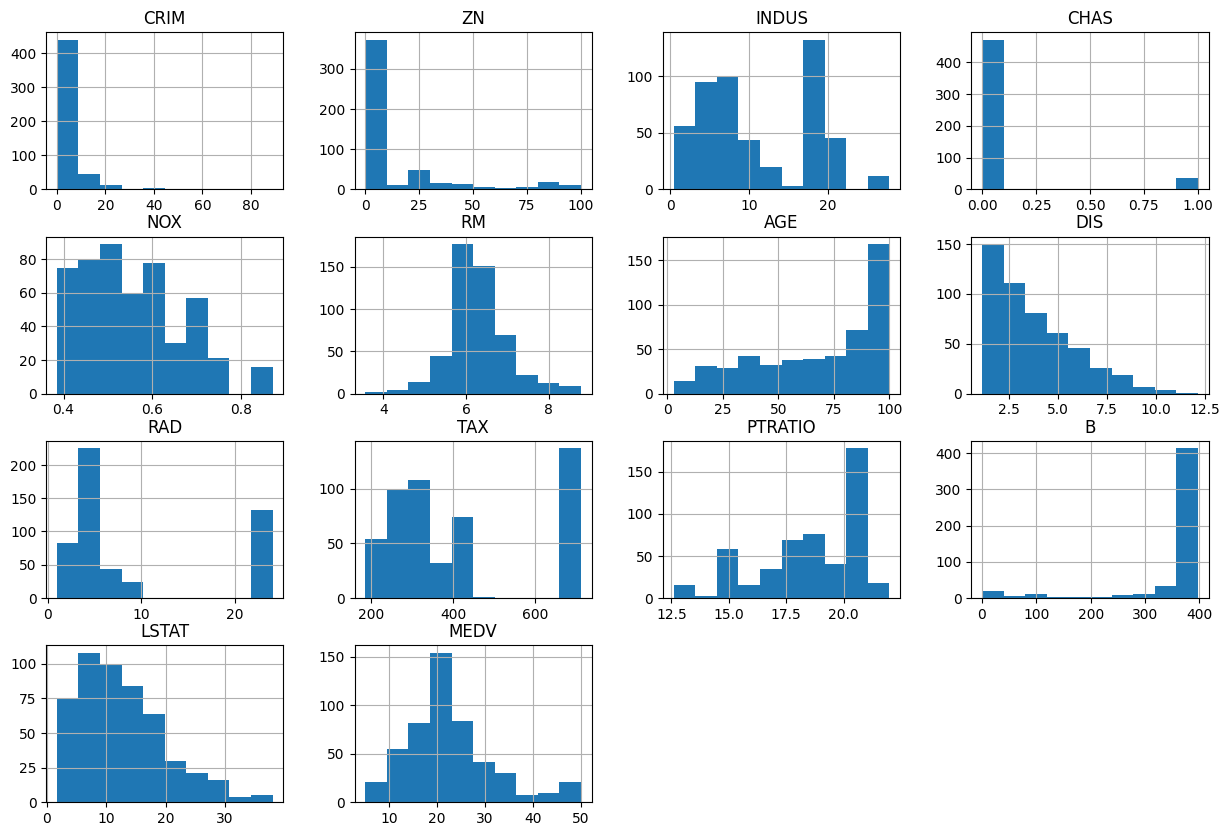

In [4]:
# Show variable distributions
dataset.hist()
plt.show()

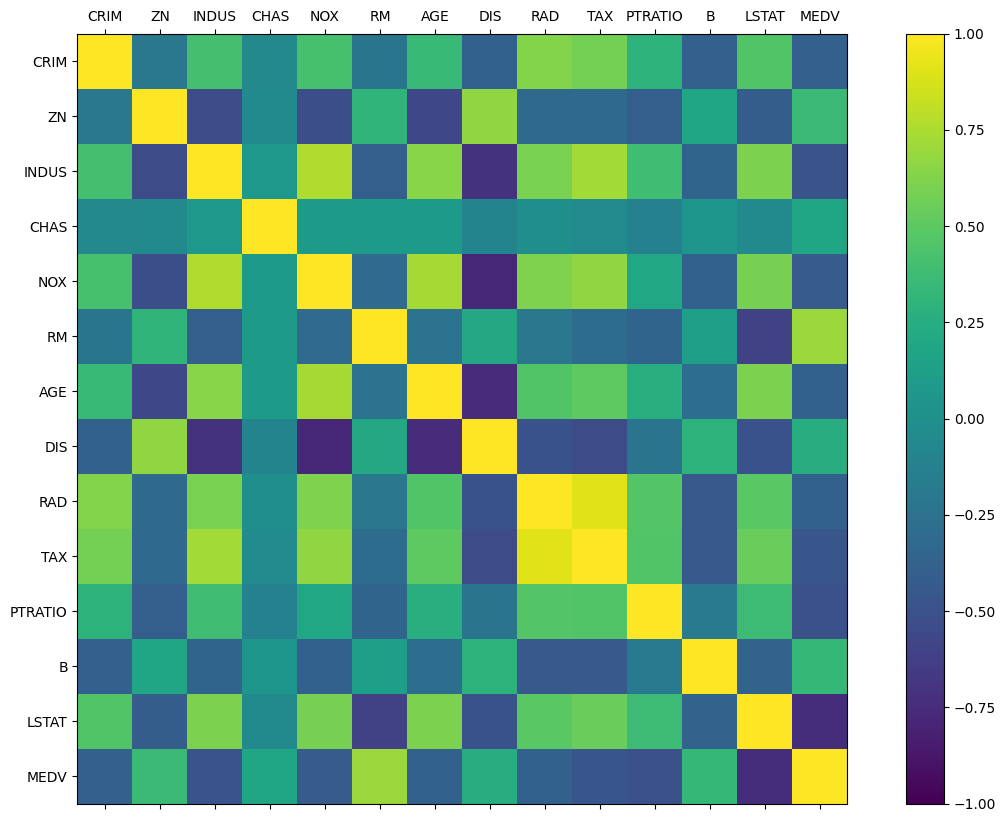

In [5]:
# Plot the correlation matrix
correlations = dataset.corr()
fig = plt.figure()
ax = fig.add_subplot()

cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0, 14, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.show()

# Data pre-processing

In [6]:
# Split the dataset in features (X) and target (y)
X = dataset.values[:, :13]
y = dataset.values[:, 13]

# Split X in training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
print('Training samples: ', len(y_train))
print('validation samples: ', len(y_valid))

Training samples:  404
validation samples:  102


# Model evaluation

In [7]:
# Initizlize the algorithms
algorithms = [
    ('Linear', make_pipeline(StandardScaler(), LinearRegression())),
    ('Ridge', make_pipeline(StandardScaler(), Ridge())),
    ('Lasso', make_pipeline(StandardScaler(), Lasso())),
    ('ElasticNet', make_pipeline(StandardScaler(), ElasticNet())),
    ('KNN', make_pipeline(StandardScaler(), KNeighborsRegressor())),
    ('RegTrees', make_pipeline(StandardScaler(), DecisionTreeRegressor())),
]
results = []
kfold = KFold(10, shuffle=True)

In [8]:
# Evaluate all algorithms
for name, algorithm in algorithms:
    cv_result = cross_val_score(algorithm, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_result)
    print(f'{name}'.ljust(13), f'{cv_result.mean()} ({cv_result.std()})')

Linear        -23.35968678060491 (8.593504441284606)
Ridge         -23.516757145220076 (10.439369298566763)
Lasso         -28.451684536999686 (9.610685424048231)
ElasticNet    -29.844584845810733 (12.06862539449033)
KNN           -22.107961951219515 (17.92778559655417)
RegTrees      -13.659287804878044 (8.160450635755662)


# Model selection

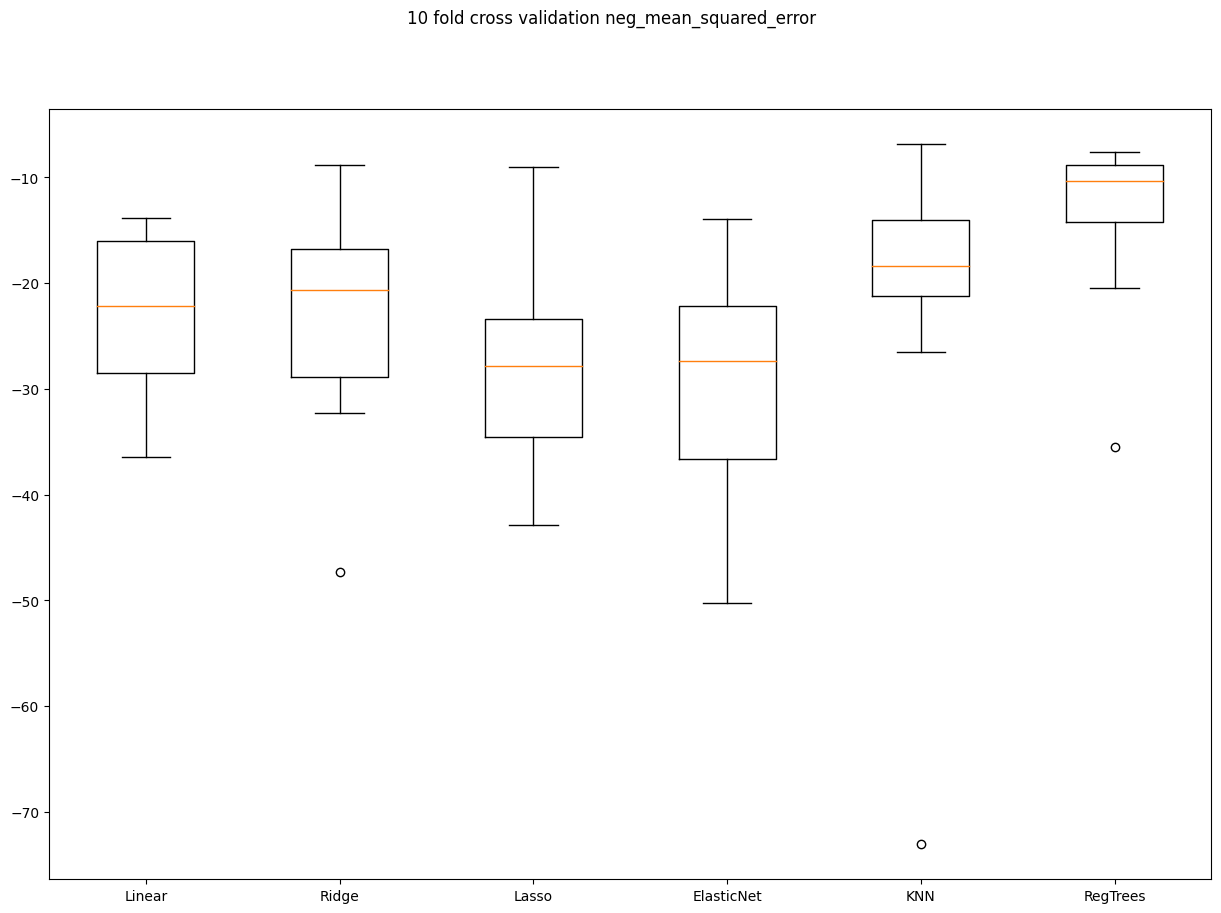

In [9]:
fig = plt.figure()
fig.suptitle('10 fold cross validation neg_mean_squared_error')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels([name for name, _ in algorithms])
plt.show()

# Selected model training

In [10]:
# Train the model
model = make_pipeline(StandardScaler(), DecisionTreeRegressor())
model.fit(X_train, y_train)

# Print some sick metrics
y_predicted = model.predict(X_valid)
print('Mean squared error: ', mean_squared_error(y_valid, y_predicted))
print('Mean absolute error: ', mean_absolute_error(y_valid, y_predicted))
print('Explained_variance_score', explained_variance_score(y_valid, y_predicted))
print('R2 score: ', r2_score(y_valid, y_predicted))

Mean squared error:  19.73019607843137
Mean absolute error:  3.1882352941176464
Explained_variance_score 0.7935967161535029
R2 score:  0.7935628853725951


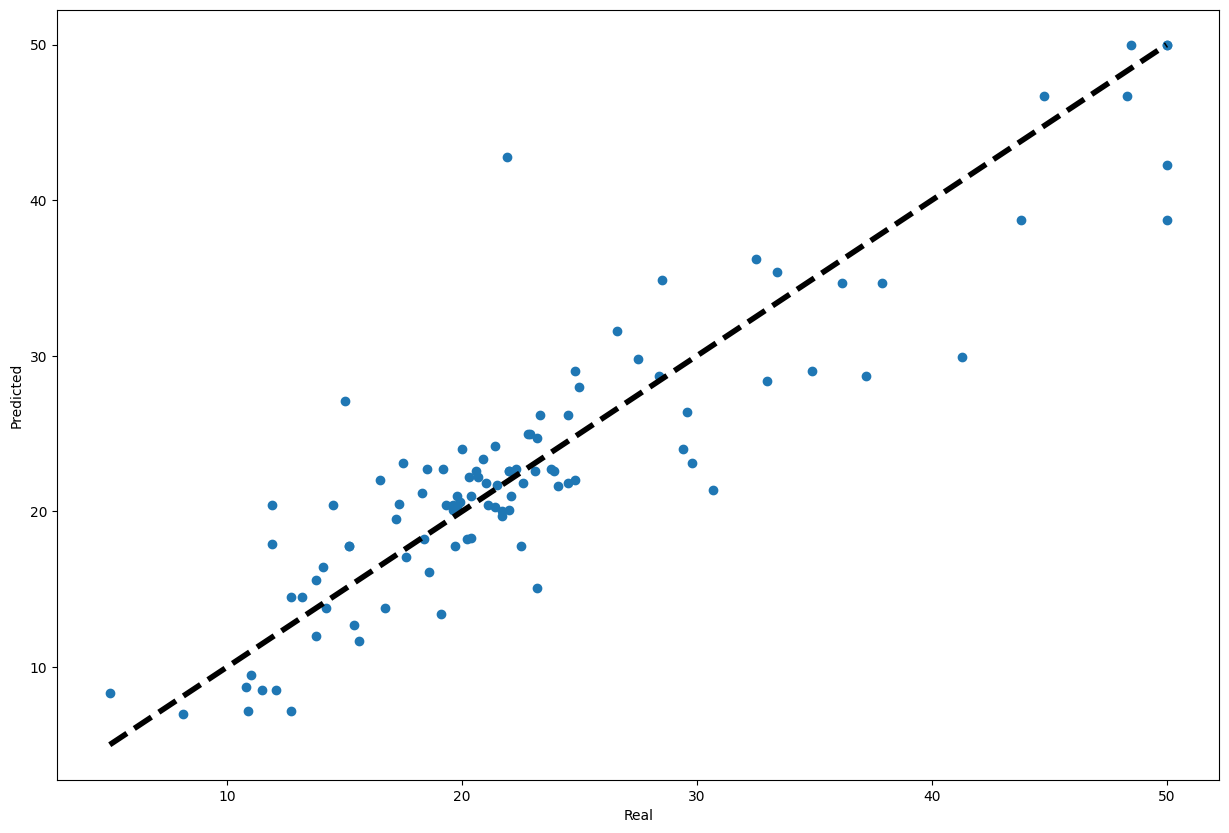

In [11]:
fig, ax = plt.subplots()
ax.scatter(y_valid, y_predicted)
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()